# Titanic - my first ML project

Task: using ML to create a model that can predict what passengers survived after the shipwreck. 

## 1. Libraries import and data upload

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

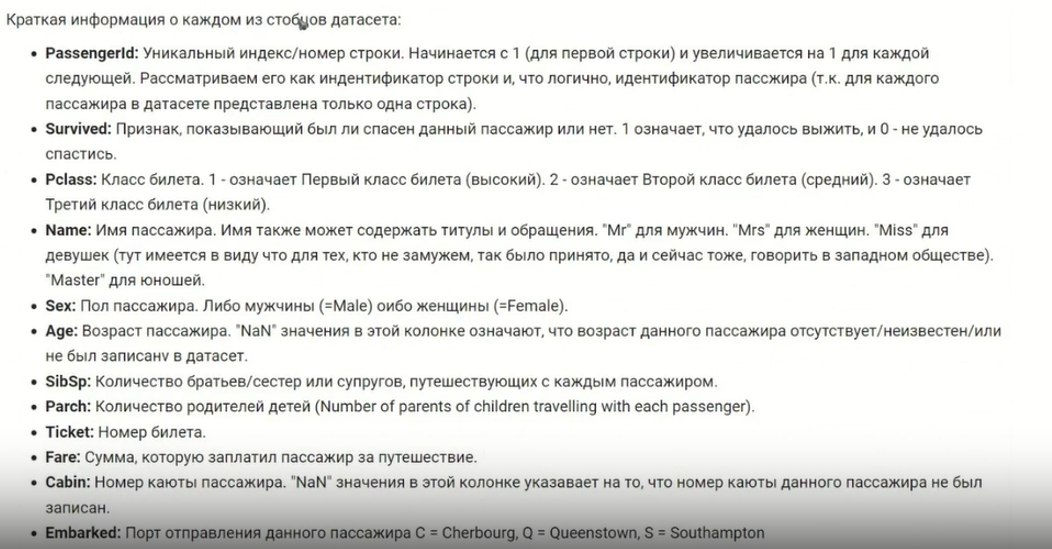

### Uploading data

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Checking for null values

In [11]:
pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], 
             index=['Train Null, %', 'Test Null, %']).T.style.background_gradient(cmap='summer_r')

,"Train Null, %","Test Null, %"
PassengerId,0.000000,0.000000
Survived,0.000000,nan
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
Age,19.865320,20.574163
SibSp,0.000000,0.000000
Parch,0.000000,0.000000
Ticket,0.000000,0.000000
Fare,0.000000,0.239234


#### Checking duplicated data

In [12]:
print(f'Train data has {df_train.duplicated().sum()} duplicated data')
print(f'Test data has {df_test.duplicated().sum()} duplicated data')

Train data has 0 duplicated data
Test data has 0 duplicated data


#### Dataset information checking

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Exploratory Data Analysis

Group variables types and create 2 functions for visualization of numeric and categorial data

In [14]:
num_var = ['SibSp', 'Parch', 'Age', 'Fare']
cat_var = ['Sex', 'Embarked', 'Pclass']
target = 'Survived'

In [26]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f'{var} Distribution histogram')
    ax[1].set_title(f'{var} Distribution Boxplot')

    plt.show()

def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    data[var].value_counts().plot(kind='pie', ax=ax[0], 
                                  explode=[0.05 for _ in data[var].dropna().unique()], 
                                  autopct='%1.1f%%')    
    ax[0].set_title(f'{var} Pie chart')
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df_train, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                       size=11, xytext=(0, 8),
                      textcoords='offset points')
    ax[1].set_title(f'{var} Bar Chart')
    plt.show()

#### Numeric

In [16]:
df_train[num_var].describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


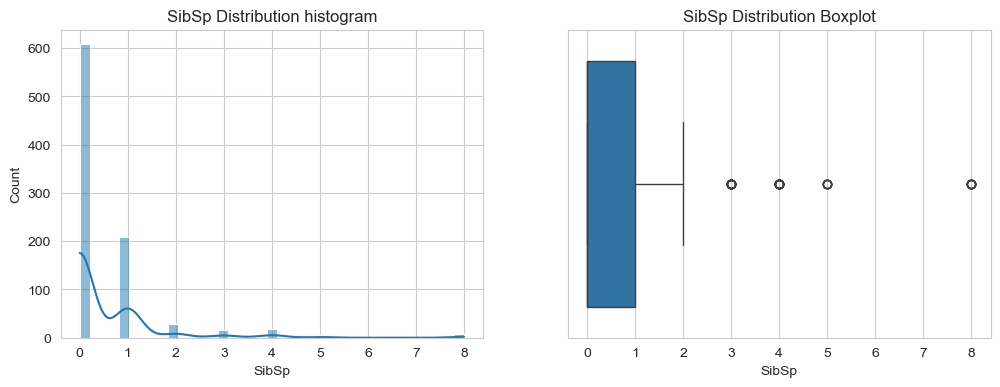

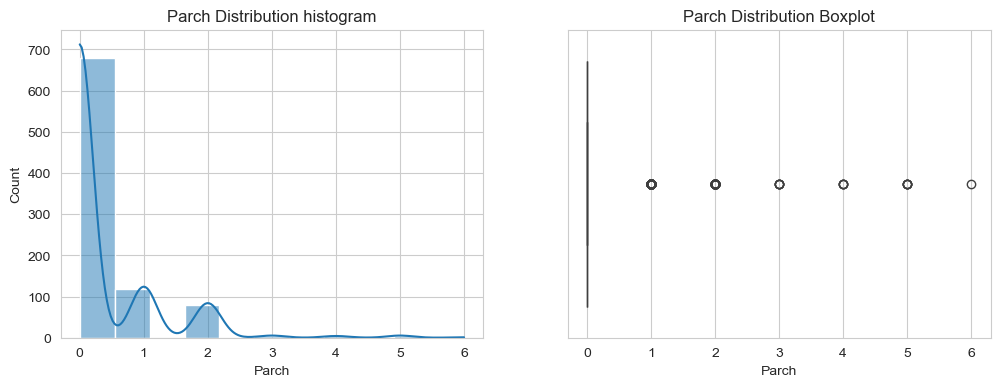

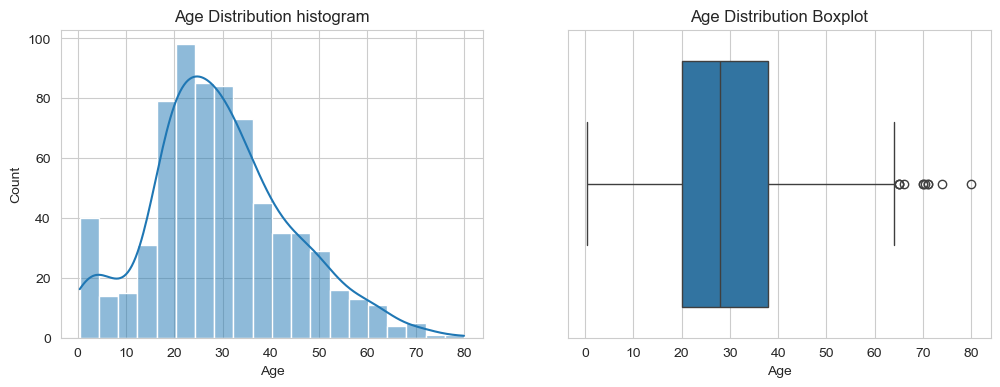

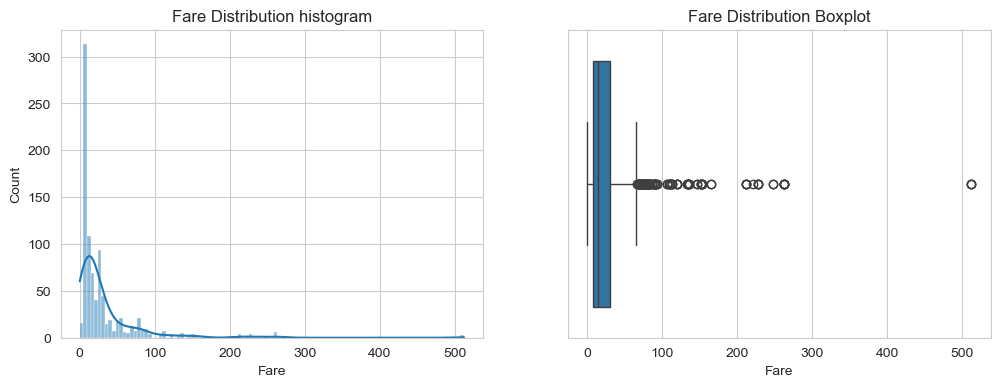

In [19]:
for var in num_var:
    num_dist(df_train, var)

#### Categorical

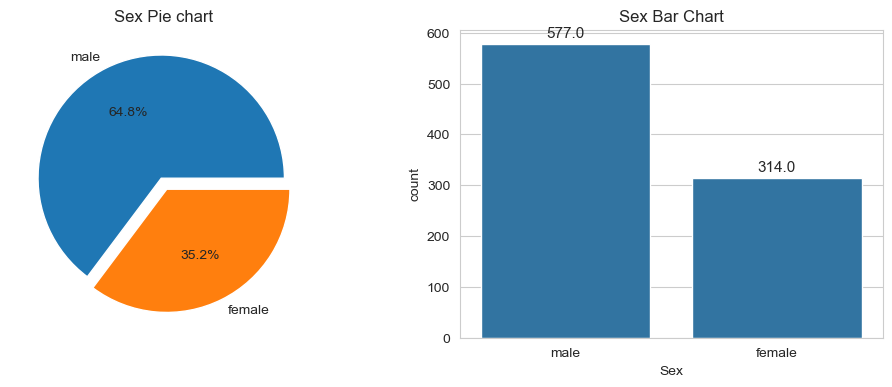

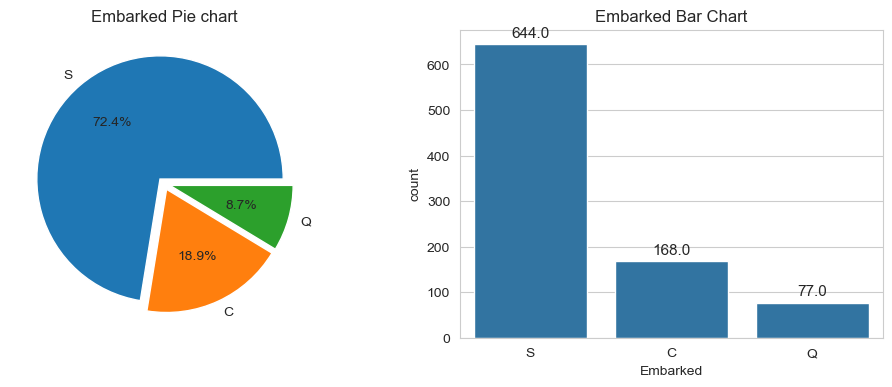

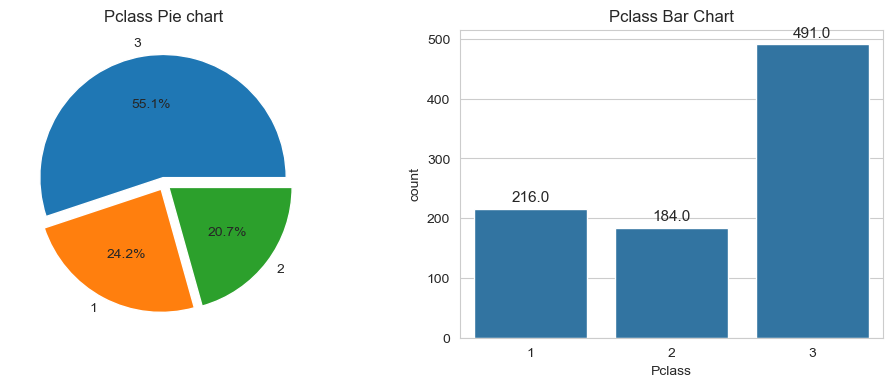

In [27]:
for var in cat_var:
    cat_dist(df_train, var)

### Survived vs Fallen

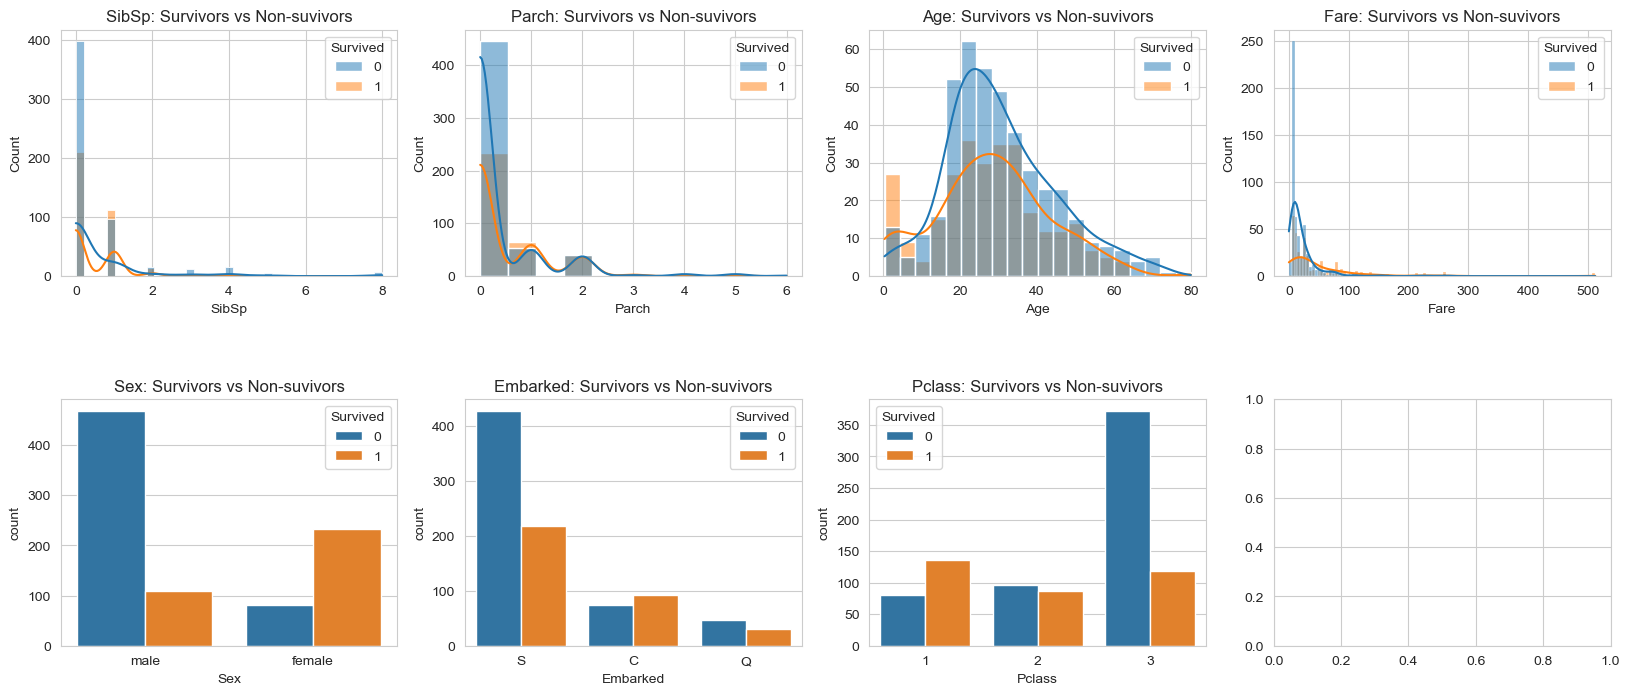

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
ax = ax.flatten()

for i, var in enumerate(num_var+cat_var):
    if i < 4:
        sns.histplot(data=df_train, x=var, hue=target, kde=True, ax=ax[i])
    else:
        sns.countplot(data=df_train, x=var, hue=target, ax=ax[i])

    ax[i].set_title(f'{var}: Survivors vs Non-suvivors')

plt.subplots_adjust(hspace=0.5)
plt.show()

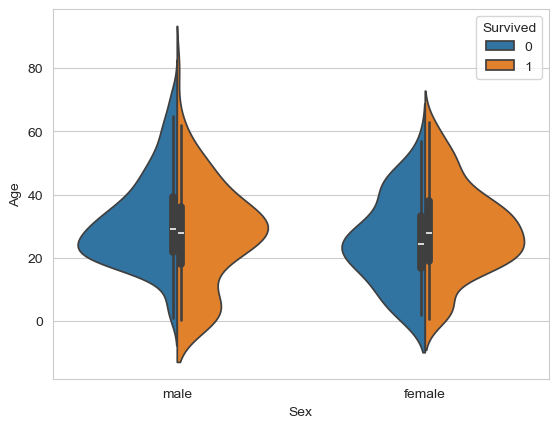

In [29]:
sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', split=True)
plt.show()

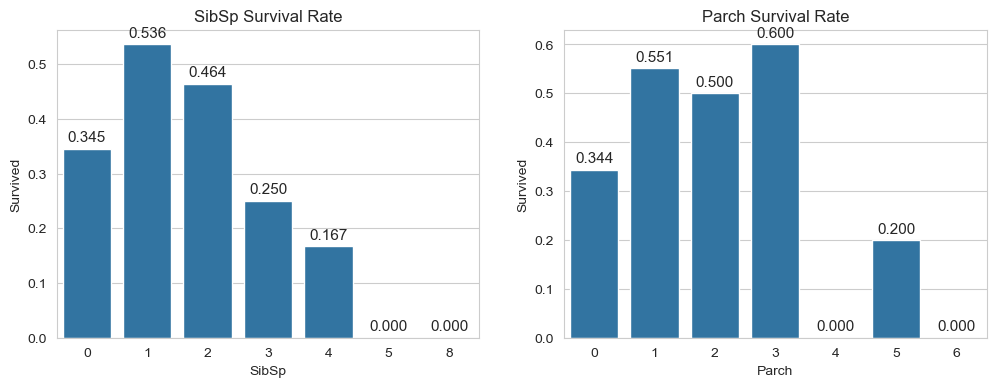

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i, var in enumerate(['SibSp', 'Parch']):
    surv = sns.barplot(data=df_train, x=var, y=target, ax=ax[i], ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=11, xytext=(0, 8),
                     textcoords='offset points')
    ax[i].set_title(f'{var} Survival Rate')

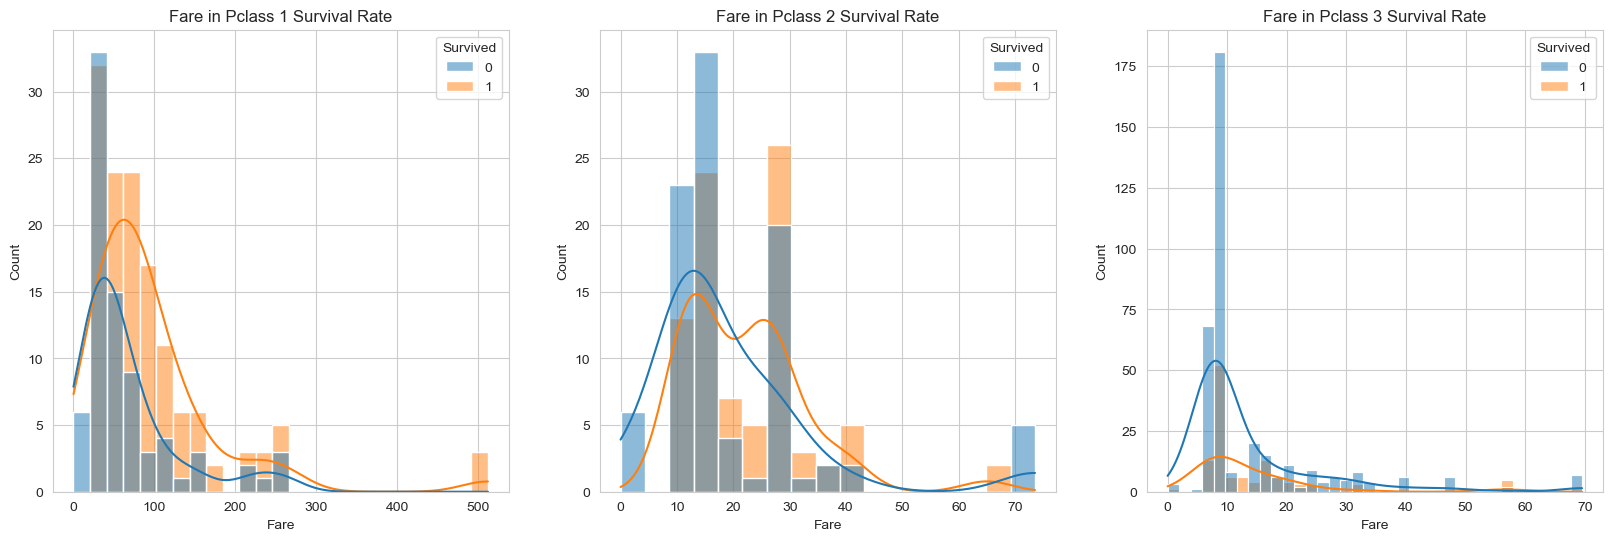

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, pc in enumerate(sorted(df_train['Pclass'].unique())):
    sns.histplot(data=df_train[df_train['Pclass'] == pc], x='Fare', hue=target, kde=True, ax=ax[i])
    ax[i].set_title(f'Fare in Pclass {pc} Survival Rate')

## 3. Feature Engineering

### PassengerId

In [32]:
df_train['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [33]:
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)

### Name

In [34]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [35]:
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

df_train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [36]:
def convert_title(title):
    if title in ['Ms', 'Mlle', 'Miss']:
        return 'Miss'
    elif title in ['Mme', 'Mrs', 'Lady', 'Countess']:
        return 'Mrs'
    elif title in ['Mr', 'Dr', 'Rev', 'Sir']:
        return 'Mr'
    elif title == 'Master':
        return 'Master'
    else:
        return 'Other'

df_train['Title'] = df_train['Title'].map(convert_title)
df_test['Title'] = df_test['Title'].map(convert_title)

df_train['Title'].value_counts()

Title
Mr        531
Miss      185
Mrs       128
Master     40
Other       7
Name: count, dtype: int64

In [37]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

### Ticket

In [38]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [40]:
# every value is unique, we cannot extract any pattern here, so we will just drop this variable

df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

### Cabin

In [41]:
# this variable has too many null values, which makes it unusable for the following modeling. 
# Therefore we will just drop it from dataset
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

### Age
This variable has about 20% null values, it's not that big number. So we will try to input some values first

In [45]:
num_train = df_train[['Fare', 'Survived', 'Parch', 'SibSp', 'Age', 'Pclass']]
num_train.corr()['Age'].sort_values(ascending=False)

Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

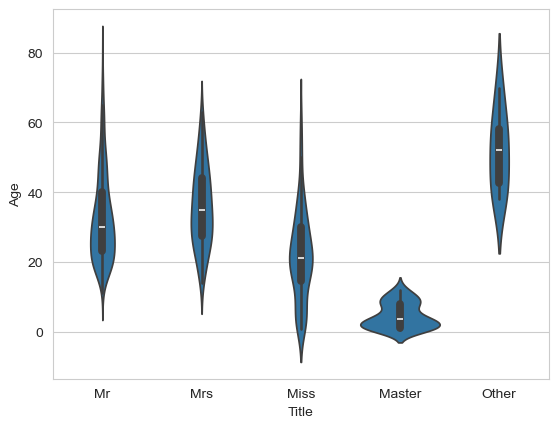

In [46]:
sns.violinplot(data=df_train, x='Title', y='Age')
plt.show()

In [47]:
df_train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.845638
Mr        32.706813
Mrs       35.873874
Other     51.571429
Name: Age, dtype: float64

In [48]:
data = [df_train, df_test]
for df in data:
    df.loc[(df['Age'].isnull()) & (df['Title'] == 'Master'), 'Age'] = 5
    df.loc[(df['Age'].isnull()) & (df['Title'] == 'Miss'), 'Age'] = 22
    df.loc[(df['Age'].isnull()) & (df['Title'] == 'Mr'), 'Age'] = 32
    df.loc[(df['Age'].isnull()) & (df['Title'] == 'Mrs'), 'Age'] = 36
    df.loc[(df['Age'].isnull()) & (df['Title'] == 'Other'), 'Age'] = 52

### Fare

In [49]:
num_train.corr()['Fare'].sort_values(ascending=False)

Fare        1.000000
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.096067
Pclass     -0.549500
Name: Fare, dtype: float64

In [51]:
df_train[df_train['Fare'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [52]:
df_test[df_test['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,male,60.5,0,0,NaN,S,Mr


In [54]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Pclass'].map(df_train.groupby('Pclass')['Fare'].mean()))

In [55]:
df_test[df_test['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


### SibSp & Parch

In [56]:
data = [df_train, df_test]
for df in data:
    df['Relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['Relatives'] > 0, 'Alone'] = 1
    df.loc[df['Relatives'] == 0, 'Alone'] = 0
    

In [57]:
df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### Encoding of categorical data

In [58]:
df_train = pd.get_dummies(df_train, prefix=['Sex', 'Embarked', 'Title'])
df_test = pd.get_dummies(df_test, prefix=['Sex', 'Embarked', 'Title'])

## 4. Model building

### Splitting of dataset to train and test sets

In [59]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train.Survived

X_test = df_test.copy()

### Scaling data

In [60]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building Classification model

#### Choosing the best algorithm

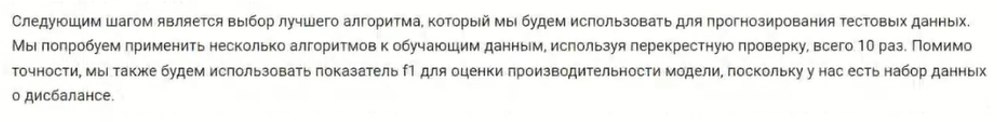

#### Classification's metrics

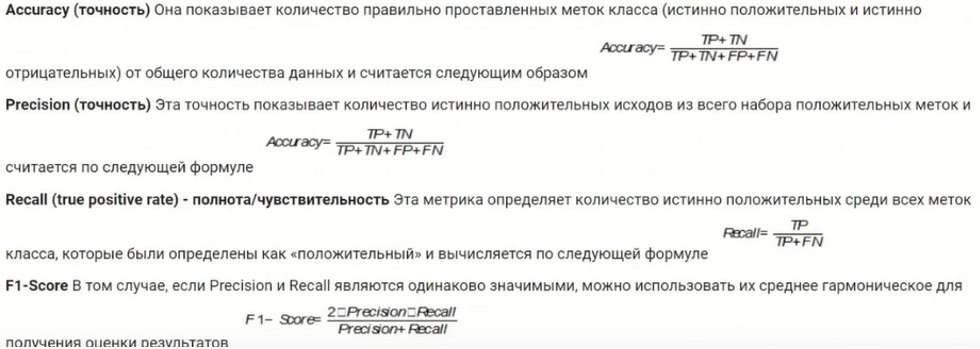

In [66]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = []
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    })

results_df = pd.DataFrame(results)
results_df['Avg_Overall'] = (results_df['Avg_Accuracy'] + results_df['Avg_F1_Score']) / 2
results_df = results_df.sort_values('Avg_Overall', ascending=False)
results_df

[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
1,LR,0.828302,0.767128,0.797715
7,LGBM,0.827203,0.763322,0.795263
6,XGB,0.820462,0.758529,0.789496
4,SVM,0.826067,0.752620,0.789344
5,MLP,0.823833,0.751021,0.787427
0,KNN,0.821623,0.751716,0.786670
3,RF,0.811548,0.746835,0.779191
2,DT,0.777828,0.713072,0.745450


#### Finding HyperParameters

In [68]:
lr = LogisticRegression()
params={
    'penalty': ('l1', 'l2', 'elasticnet'),
    'tol': (0.1, 0.01, 0.001, 0.0001),
    'C': (10.0, 1.0, 0.1, 0.01)
}
clf = GridSearchCV(lr, params, cv=10)
clf.fit(X_train_scaled, y_train)
print('Best hyperparameters:', clf.best_params_)

Best hyperparameters: {'C': 10.0, 'penalty': 'l2', 'tol': 0.001}


Train Accuracy: 0.8327721661054994
Train F1-Score: 0.7766116941529235


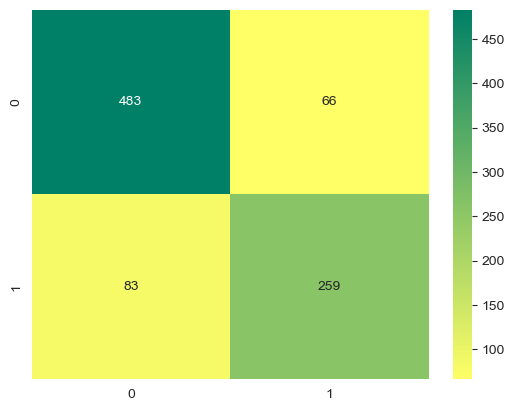

In [69]:
y_pred = clf.predict(X_train_scaled)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred)}')
print(f'Train F1-Score: {f1_score(y_train, y_pred)}')
sns.heatmap(confusion_matrix(y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [70]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



### Submit Test Prediction

In [71]:
y_pred = clf.predict(X_test_scaled)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = y_pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
